In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense
from keras.layers import LSTM,BatchNormalization
from keras.layers import Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
import io

In [3]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
TheftData=pd.read_csv("D:\ElectricityTheft\Dataset\TunedElectricityDataset.csv")

In [5]:
#Converting the Categorical features
TheftData.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,10.120000,9.960000,16.920000,7.600000,27.220000,18.050000,26.470000,18.75000,17.840000,14.92000
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.32268,11.015589,10.69165
3,B32AC8CC6D5D805AC053557AB05F5343,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,6.500000,9.990000,11.780000,18.590000,26.800000,18.570000,14.590000,12.82000,19.370000,15.92000
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.900000,3.420000,3.810000,4.5800,3.56000,4.250000,3.860000,3.530000,...,17.770000,10.370000,15.320000,13.510000,12.230000,14.680000,16.350000,18.14000,18.410000,17.31000


In [6]:
X = TheftData.iloc[:, 2:1036].astype('float32' )
y = TheftData.iloc[:, 1]

In [7]:
X

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,10.120000,9.960000,16.920000,7.600000,27.219999,18.049999,26.469999,18.750000,17.840000,14.920000
1,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,8.836129,9.304656,10.758718,9.942215,11.173497,11.482926,11.656425,11.322680,11.015589,10.691649
3,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,6.500000,9.990000,11.780000,18.590000,26.799999,18.570000,14.590000,12.820000,19.370001,15.920000
4,2.900000,3.420000,3.8100,4.580000,3.56000,4.250000,3.860000,3.530000,3.410000,0.850000,...,17.770000,10.370000,15.320000,13.510000,12.230000,14.680000,16.350000,18.139999,18.410000,17.309999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,4.250000,3.560000,3.380000,4.390000,3.720000,3.770000,3.960000,3.640000,3.400000,4.380000
42368,2.700000,4.390000,3.9500,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.810000,4.870000,4.480000,3.670000,3.310000,4.580000,3.330000,3.190000,4.570000,4.000000
42369,0.580000,0.840000,1.6100,0.900000,0.60000,0.820000,0.890000,0.030000,0.730000,1.680000,...,8.836129,0.660000,2.920000,2.360000,3.860000,4.280000,3.370000,6.670000,2.440000,1.150000
42370,16.889999,13.840000,13.5000,14.600000,14.46000,12.340000,15.370000,17.010000,13.460000,19.559999,...,21.129999,13.750000,22.610001,18.830000,25.520000,18.110001,19.309999,17.480000,17.200001,15.280000


In [8]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming X_train and y_train are your training data
# X_train.shape = (n_samples, n_features), y_train.shape = (n_samples,)

# Initialize RandomOverSampler
smoteSampling = SMOTE(random_state=40)

# Resample the training data
X_resampled, y_resampled = smoteSampling.fit_resample(X, y)

# Now X_train_resampled and y_train_resampled are balanced


In [9]:
X_resampled

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,7.168735,6.954202,6.784100,7.084301,10.516470,7.219634,7.341512,7.160004,6.839875,7.053545,...,10.120000,9.960000,16.920000,7.600000,27.219999,18.049999,26.469999,18.750000,17.840000,14.920000
1,7.168735,6.954202,6.784100,7.084301,10.516470,7.219634,7.341512,7.160004,6.839875,7.053545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,7.168735,6.954202,6.784100,7.084301,10.516470,7.219634,7.341512,7.160004,6.839875,7.053545,...,8.836129,9.304656,10.758718,9.942215,11.173497,11.482926,11.656425,11.322680,11.015589,10.691649
3,7.168735,6.954202,6.784100,7.084301,10.516470,7.219634,7.341512,7.160004,6.839875,7.053545,...,6.500000,9.990000,11.780000,18.590000,26.799999,18.570000,14.590000,12.820000,19.370001,15.920000
4,2.900000,3.420000,3.810000,4.580000,3.560000,4.250000,3.860000,3.530000,3.410000,0.850000,...,17.770000,10.370000,15.320000,13.510000,12.230000,14.680000,16.350000,18.139999,18.410000,17.309999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77509,0.019400,0.026247,0.009129,0.009129,0.021682,0.035376,0.007988,0.006847,0.002282,0.010270,...,0.003423,0.004565,0.171741,0.002282,0.000000,0.006847,0.025106,0.000000,0.011412,0.002282
77510,1.562325,1.993360,2.127744,2.606236,3.280197,2.517694,1.612956,2.559833,2.457901,3.034522,...,2.712837,1.966916,3.587300,6.221015,3.332158,2.927911,3.514719,3.752906,3.760936,3.530443
77511,11.469708,11.683702,11.306603,11.458680,11.249722,11.559168,11.117074,11.528759,11.405993,11.330052,...,113.483002,90.645576,85.923119,102.355392,96.159721,97.992249,89.705574,97.441887,94.939819,98.005211
77512,7.168735,6.954202,6.784100,7.084301,10.516470,7.219634,7.341512,7.160004,6.839875,7.053545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
y_resampled

0        1
1        1
2        1
3        1
4        1
        ..
77509    1
77510    1
77511    1
77512    1
77513    1
Name: FLAG, Length: 77514, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_resampled)
y_resampled = encoder.transform(y_resampled)


from sklearn.preprocessing import OneHotEncoder
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y_resampled.reshape(len(y_resampled), 1)
y_resampled = onehot_encoder.fit_transform(integer_encoded)
print(y_resampled)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state = 10)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train

array([[-0.0492661 , -0.05202205, -0.0469311 , ..., -0.03060985,
        -0.04159106, -0.04799397],
       [-0.13264638, -0.10566953, -0.12429278, ..., -0.10702391,
        -0.10298633, -0.09707484],
       [-0.11606925, -0.13434914, -0.13949895, ..., -0.07995903,
        -0.08851536, -0.08141312],
       ...,
       [ 0.03893863,  0.03343402, -0.00949961, ..., -0.07524748,
        -0.07312993, -0.06344948],
       [-0.0492661 , -0.05202205, -0.0469311 , ..., -0.08425309,
        -0.0953732 , -0.08774645],
       [-0.06144419, -0.06131804, -0.08047669, ..., -0.09497122,
        -0.09455121, -0.08431489]], dtype=float32)

In [14]:
X_train.shape

(58135, 1034)

In [15]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [16]:
y_train.shape

(58135, 2)

In [17]:
X_test.shape

(19379, 1034)

In [18]:
y_test.shape

(19379, 2)

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Add input layer
model.add(layers.Input(shape=(1034,)))

# Add hidden layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))  # Adding dropout for regularization
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))

# Add output layer
model.add(layers.Dense(2, activation='softmax'))  # Adjust activation based on your task (e.g., 'softmax' for multi-class classification)

# Compile the model


# Print model summary

In [20]:
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train, y_train,validation_split=0.25, batch_size = 256, epochs = 200)

C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
171/171 [==============================] - 7s 19ms/step - loss: 0.6816 - accuracy: 0.5471 - val_loss: 0.6641 - val_accuracy: 0.5802
Epoch 2/200
171/171 [==============================] - 2s 14ms/step - loss: 0.6659 - accuracy: 0.5793 - val_loss: 0.6567 - val_accuracy: 0.5932
Epoch 3/200
171/171 [==============================] - 2s 14ms/step - loss: 0.6592 - accuracy: 0.5945 - val_loss: 0.6508 - val_accuracy: 0.6047
Epoch 4/200
171/171 [==============================] - 2s 14ms/step - loss: 0.6548 - accuracy: 0.6007 - val_loss: 0.6458 - val_accuracy: 0.6112
Epoch 5/200
171/171 [==============================] - 2s 14ms/step - loss: 0.6498 - accuracy: 0.6117 - val_loss: 0.6413 - val_accuracy: 0.6157
Epoch 6/200
171/171 [==============================] - 2s 14ms/step - loss: 0.6454 - accuracy: 0.6179 - val_loss: 0.6374 - val_accuracy: 0.6210
Epoch 7/200
171/171 [==============================] - 2s 14ms/step - loss: 0.6429 - accuracy: 0.6231 - val_loss: 0.6341 - val_accuracy:

171/171 [==============================] - 2s 13ms/step - loss: 0.3598 - accuracy: 0.8442 - val_loss: 0.3748 - val_accuracy: 0.8309
Epoch 114/200
171/171 [==============================] - 2s 13ms/step - loss: 0.3600 - accuracy: 0.8422 - val_loss: 0.3691 - val_accuracy: 0.8391
Epoch 115/200
171/171 [==============================] - 2s 13ms/step - loss: 0.3604 - accuracy: 0.8403 - val_loss: 0.3674 - val_accuracy: 0.8405
Epoch 116/200
171/171 [==============================] - 2s 13ms/step - loss: 0.3541 - accuracy: 0.8450 - val_loss: 0.3678 - val_accuracy: 0.8413
Epoch 117/200
171/171 [==============================] - 2s 13ms/step - loss: 0.3488 - accuracy: 0.8478 - val_loss: 0.3615 - val_accuracy: 0.8462
Epoch 118/200
171/171 [==============================] - 2s 13ms/step - loss: 0.3473 - accuracy: 0.8497 - val_loss: 0.3591 - val_accuracy: 0.8417
Epoch 119/200
171/171 [==============================] - 2s 14ms/step - loss: 0.3456 - accuracy: 0.8490 - val_loss: 0.3572 - val_accuracy:

In [21]:
history.history['accuracy']

[0.5470746159553528,
 0.5792527794837952,
 0.594504714012146,
 0.6007201671600342,
 0.611729085445404,
 0.6178757548332214,
 0.623059093952179,
 0.6273938417434692,
 0.6345037817955017,
 0.6358569860458374,
 0.6404898762702942,
 0.6446641087532043,
 0.6455585956573486,
 0.6526685357093811,
 0.6567739248275757,
 0.6586087346076965,
 0.6626912355422974,
 0.6658792495727539,
 0.6666361093521118,
 0.6718423962593079,
 0.6760854125022888,
 0.678860604763031,
 0.6810623407363892,
 0.6838145852088928,
 0.685947597026825,
 0.6887456774711609,
 0.6917272806167603,
 0.6932638883590698,
 0.6966124773025513,
 0.6973004937171936,
 0.6991124153137207,
 0.6994105577468872,
 0.7022545337677002,
 0.7050985097885132,
 0.7071167826652527,
 0.7098460793495178,
 0.7128047347068787,
 0.713424026966095,
 0.7152817845344543,
 0.7190660834312439,
 0.7206944823265076,
 0.7205798029899597,
 0.7232861518859863,
 0.7236072421073914,
 0.7261530756950378,
 0.7297309637069702,
 0.7297768592834473,
 0.7331024408340454

In [22]:
history.history['val_accuracy']

[0.5802257061004639,
 0.59316086769104,
 0.604651153087616,
 0.6111875772476196,
 0.6156598329544067,
 0.6210265755653381,
 0.6254300475120544,
 0.6294206976890564,
 0.636507511138916,
 0.6386404037475586,
 0.6428374648094177,
 0.6448327898979187,
 0.6491674780845642,
 0.6504747271537781,
 0.65446537733078,
 0.6572175621986389,
 0.6620338559150696,
 0.665680468082428,
 0.6721480488777161,
 0.6747626066207886,
 0.674625039100647,
 0.6796477437019348,
 0.6827439069747925,
 0.6831567287445068,
 0.6859089136123657,
 0.6918260455131531,
 0.690862774848938,
 0.6942341923713684,
 0.6952662467956543,
 0.7000137567520142,
 0.7002201676368713,
 0.7002201676368713,
 0.7034539580345154,
 0.7051052451133728,
 0.7055180668830872,
 0.7048300504684448,
 0.7060685157775879,
 0.7077886462211609,
 0.7092335224151611,
 0.709990382194519,
 0.7165267467498779,
 0.7148066759109497,
 0.7158387303352356,
 0.7176276445388794,
 0.722719132900238,
 0.7271913886070251,
 0.7254713177680969,
 0.7290491461753845,
 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


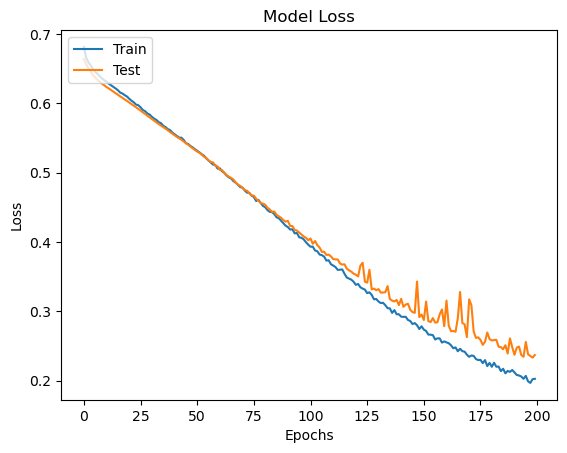

In [23]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.show()

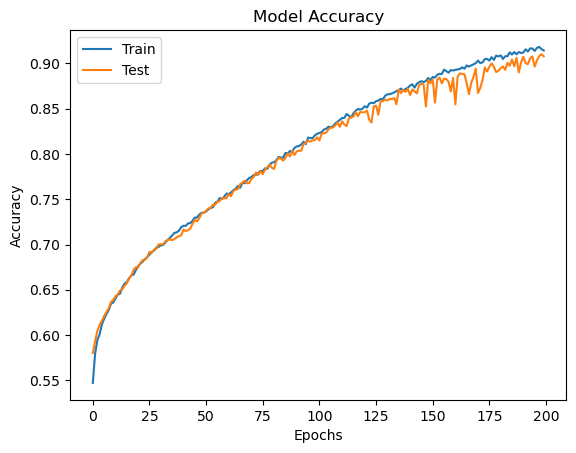

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.show()

In [25]:
y_pred = model.predict(X_test)

606/606 [==============================] - 1s 2ms/step


In [26]:
for y in y_pred:
    print(y)
    print("==============")

[1.5486967e-04 9.9984527e-01]
[0.9884561  0.01154394]
[1.4193862e-04 9.9985814e-01]
[0.01181223 0.9881877 ]
[0.00820849 0.9917914 ]
[5.2948686e-04 9.9947059e-01]
[0.01603009 0.98396987]
[9.9999994e-01 1.8322297e-11]
[0.01263144 0.9873685 ]
[9.9999720e-01 2.7932729e-06]
[0.28424224 0.7157578 ]
[9.9999994e-01 3.1791565e-08]
[0.9681234  0.03187661]
[0.3166331 0.6833669]
[0.00726201 0.9927379 ]
[1.763485e-05 9.999823e-01]
[9.153839e-04 9.990846e-01]
[1.401774e-05 9.999859e-01]
[7.8075763e-04 9.9921924e-01]
[3.2679633e-05 9.9996728e-01]
[0.00321886 0.9967811 ]
[2.3931418e-04 9.9976063e-01]
[0.99454457 0.00545549]
[9.9999994e-01 5.7629692e-31]
[0.79655474 0.20344512]
[1.4617666e-16 9.9999994e-01]
[0.99672955 0.00327043]
[0.9968697  0.00313041]
[0.01033904 0.98966104]
[9.9998647e-01 1.3488452e-05]
[0.9747136  0.02528634]
[0.01051867 0.9894813 ]
[4.0774900e-04 9.9959224e-01]
[0.7057562  0.29424378]
[9.9999994e-01 1.5343735e-10]
[0.20573977 0.7942602 ]
[9.999650e-01 3.493449e-05]
[9.9999994e-01

[0.20514156 0.79485846]
[0.0235465 0.9764535]
[4.4559626e-04 9.9955434e-01]
[1.1279599e-08 9.9999994e-01]
[3.3318758e-04 9.9966681e-01]
[0.00145232 0.9985476 ]
[9.9953431e-01 4.6570937e-04]
[0.1510483  0.84895164]
[9.9999994e-01 7.4760850e-11]
[7.5047569e-06 9.9999243e-01]
[8.3689106e-10 9.9999994e-01]
[2.825872e-04 9.997175e-01]
[0.53817827 0.46182176]
[0.96718717 0.03281286]
[5.619954e-04 9.994379e-01]
[9.9999994e-01 2.5649023e-09]
[0.01656165 0.9834383 ]
[2.4488920e-11 9.9999994e-01]
[0.20224231 0.7977576 ]
[0.92137    0.07862995]
[0.03221918 0.96778077]
[9.9999946e-01 4.8042438e-07]
[0.0252004  0.97479963]
[1.6023903e-04 9.9983978e-01]
[2.5973375e-05 9.9997395e-01]
[0.12116922 0.8788308 ]
[9.9999875e-01 1.2314406e-06]
[3.3483510e-10 9.9999994e-01]
[0.21974823 0.7802518 ]
[0.60244876 0.39755124]
[9.9999994e-01 5.4025456e-08]
[0.00320065 0.9967993 ]
[0.22418138 0.7758185 ]
[2.0791621e-04 9.9979210e-01]
[1.0212772e-04 9.9989778e-01]
[0.37459174 0.6254082 ]
[0.00287281 0.9971272 ]
[9.9

[0.9952715  0.00472856]
[0.00422341 0.9957766 ]
[0.08259336 0.91740674]
[0.53718877 0.46281117]
[0.00112964 0.99887025]
[9.9999994e-01 1.6244222e-13]
[9.9999994e-01 1.1165637e-08]
[0.14754812 0.85245186]
[9.9999994e-01 1.7567412e-09]
[0.00239051 0.99760944]
[6.805488e-05 9.999319e-01]
[0.02974267 0.97025734]
[0.11622728 0.88377273]
[0.31886974 0.68113035]
[9.9999517e-01 4.8121174e-06]
[0.00412721 0.99587286]
[0.03952716 0.96047276]
[0.9974911  0.00250878]
[9.9992126e-01 7.8705227e-05]
[9.9999994e-01 2.1464606e-08]
[0.99061394 0.00938606]
[0.99309427 0.00690565]
[0.05753352 0.9424665 ]
[8.6492025e-07 9.9999911e-01]
[2.8498302e-04 9.9971509e-01]
[0.65653455 0.3434655 ]
[9.9999875e-01 1.2133044e-06]
[0.05713954 0.9428605 ]
[9.246719e-04 9.990753e-01]
[9.999977e-01 2.266247e-06]
[0.11368924 0.8863108 ]
[0.9706515  0.02934853]
[9.9999994e-01 2.2134632e-17]
[1.0080095e-04 9.9989909e-01]
[0.04352338 0.9564767 ]
[0.07137516 0.92862487]
[0.26074654 0.7392535 ]
[5.2019340e-07 9.9999946e-01]
[8.8

[0.24857478 0.75142515]
[0.99643755 0.00356249]
[9.991582e-01 8.417194e-04]
[9.9968910e-01 3.1096314e-04]
[0.77066666 0.2293334 ]
[0.72104335 0.27895656]
[9.9999410e-01 5.8543887e-06]
[8.4995227e-05 9.9991494e-01]
[0.00542423 0.99457574]
[0.99008304 0.00991698]
[9.9999994e-01 1.2100920e-08]
[9.9998277e-01 1.7137243e-05]
[0.25615406 0.7438459 ]
[9.9999994e-01 2.1574371e-11]
[0.952411   0.04758909]
[2.4013246e-04 9.9975991e-01]
[5.468339e-04 9.994532e-01]
[9.9982452e-01 1.7560691e-04]
[0.03004605 0.96995395]
[0.9966493  0.00335069]
[0.21558443 0.7844156 ]
[5.7793888e-05 9.9994212e-01]
[0.99999994 0.        ]
[9.9994916e-01 5.0788552e-05]
[0.7741711  0.22582886]
[2.5356369e-06 9.9999744e-01]
[3.3473694e-05 9.9996644e-01]
[0.16808738 0.83191264]
[9.9988979e-01 1.1008578e-04]
[0.29857635 0.7014237 ]
[0.00146355 0.9985364 ]
[0.13148575 0.8685143 ]
[2.9685098e-06 9.9999696e-01]
[9.9999994e-01 1.1406840e-11]
[0.24214219 0.75785774]
[0.11823041 0.8817696 ]
[0.9984643  0.00153567]
[9.9999839e-01

[9.9931043e-01 6.8945903e-04]
[0.9896659  0.01033408]
[9.9996847e-01 3.1529653e-05]
[1.4972762e-06 9.9999839e-01]
[0.53356045 0.4664396 ]
[2.605243e-04 9.997395e-01]
[0.00817664 0.9918233 ]
[0.0611559  0.93884414]
[2.9799345e-04 9.9970210e-01]
[0.15856491 0.8414351 ]
[9.99999e-01 9.98397e-07]
[0.00188154 0.99811846]
[9.9999994e-01 3.8090464e-12]
[0.02339149 0.9766085 ]
[0.998836   0.00116408]
[0.756574 0.243426]
[0.03235712 0.96764284]
[1.2303195e-05 9.9998766e-01]
[0.00938504 0.990615  ]
[0.99629986 0.00370007]
[0.99844503 0.00155504]
[9.9979854e-01 2.0142164e-04]
[9.9996144e-01 3.8469123e-05]
[0.9625325  0.03746747]
[0.90959024 0.09040968]
[0.01611367 0.98388636]
[0.142438  0.8575619]
[9.9999970e-01 2.4092978e-07]
[0.0259907 0.9740093]
[9.9978590e-01 2.1421249e-04]
[0.02410172 0.97589827]
[1.971434e-05 9.999803e-01]
[9.9999064e-01 9.3239196e-06]
[0.49142435 0.5085757 ]
[0.00275405 0.99724597]
[5.830908e-06 9.999941e-01]
[0.80345464 0.1965454 ]
[0.03361196 0.9663881 ]
[0.1413878 0.858

[9.9999624e-01 3.6927186e-06]
[0.6865742  0.31342578]
[2.7413329e-04 9.9972594e-01]
[0.00337812 0.9966218 ]
[8.5562788e-06 9.9999136e-01]
[0.18569863 0.8143014 ]
[1.7512422e-08 9.9999994e-01]
[0.0682179  0.93178207]
[9.9999994e-01 5.1939129e-08]
[0.9008611  0.09913886]
[6.5282115e-04 9.9934715e-01]
[0.80551904 0.19448094]
[0.00372221 0.9962778 ]
[0.9358662  0.06413382]
[0.9928301  0.00716991]
[9.9999815e-01 1.8274600e-06]
[9.9995881e-01 4.1119158e-05]
[0.04354747 0.9564525 ]
[4.1852509e-06 9.9999577e-01]
[9.9999744e-01 2.4748495e-06]
[9.999556e-01 4.434107e-05]
[0.00186376 0.99813616]
[3.1119562e-12 9.9999994e-01]
[0.27193263 0.7280674 ]
[9.9999994e-01 1.6478404e-08]
[9.9943650e-01 5.6336564e-04]
[9.996890e-01 3.110586e-04]
[0.9985588  0.00144113]
[8.591474e-05 9.999140e-01]
[9.9996191e-01 3.8073467e-05]
[6.1900984e-10 9.9999994e-01]
[8.714234e-04 9.991286e-01]
[0.9963019  0.00369812]
[0.41792956 0.5820704 ]
[9.999998e-01 1.252524e-07]
[9.9999994e-01 3.3701439e-09]
[0.2593473 0.7406527

[0.9381426  0.06185733]
[2.2605036e-05 9.9997729e-01]
[0.5271074  0.47289267]
[0.120373 0.879627]
[0.94623446 0.0537656 ]
[0.22894569 0.77105427]
[2.8432353e-04 9.9971569e-01]
[9.9999660e-01 3.3202532e-06]
[9.999998e-01 6.086991e-08]
[3.5710598e-06 9.9999636e-01]
[0.60606277 0.3939371 ]
[0.0216128 0.9783872]
[0.7398475 0.2601525]
[0.65298826 0.34701172]
[0.77066666 0.2293334 ]
[9.9999946e-01 4.6370585e-07]
[9.9999660e-01 3.3873605e-06]
[0.01872969 0.9812702 ]
[9.9985361e-01 1.4638103e-04]
[0.61262995 0.38737005]
[0.9980689  0.00193099]
[9.9999863e-01 1.2546153e-06]
[9.9999970e-01 2.5907468e-07]
[0.0019187 0.9980813]
[0.20791896 0.792081  ]
[0.00111488 0.99888504]
[1.9660547e-04 9.9980330e-01]
[0.99370384 0.00629606]
[9.9999994e-01 2.1056794e-08]
[3.6368703e-05 9.9996358e-01]
[9.9999982e-01 1.4927066e-07]
[0.00425706 0.99574286]
[9.9996692e-01 3.3031432e-05]
[9.9999994e-01 9.7811079e-11]
[9.9994737e-01 5.2606752e-05]
[9.9999982e-01 1.1584737e-07]
[9.991948e-01 8.051724e-04]
[0.00276461 

[9.9999994e-01 6.7041657e-11]
[0.08082031 0.91917974]
[0.00659483 0.9934051 ]
[0.97834307 0.02165691]
[0.97220623 0.02779385]
[9.9964833e-01 3.5168228e-04]
[0.00536375 0.9946362 ]
[0.96344036 0.03655958]
[5.4779276e-04 9.9945223e-01]
[9.9999851e-01 1.4833396e-06]
[0.97610897 0.02389109]
[3.5266535e-04 9.9964738e-01]
[0.9985955  0.00140445]
[0.9666628  0.03333721]
[3.5322557e-04 9.9964678e-01]
[1.9272541e-06 9.9999803e-01]
[9.9968886e-01 3.1113511e-04]
[9.9998468e-01 1.5228114e-05]
[0.29157504 0.70842487]
[0.99730116 0.00269883]
[9.7435433e-05 9.9990255e-01]
[0.00424742 0.99575263]
[0.01609124 0.9839088 ]
[0.97155815 0.02844184]
[9.5979685e-06 9.9999028e-01]
[0.02528185 0.97471815]
[9.9999434e-01 5.6056597e-06]
[5.2280616e-06 9.9999470e-01]
[0.07632772 0.92367226]
[9.9999660e-01 3.2965174e-06]
[0.00706214 0.9929379 ]
[9.999990e-01 9.292912e-07]
[4.7955346e-05 9.9995202e-01]
[9.9999994e-01 1.2060912e-09]
[0.00668878 0.9933112 ]
[0.00270449 0.99729556]
[9.999991e-01 7.980194e-07]
[9.99969

In [27]:
predicted = []
for y in y_pred:
    max_index = y.tolist().index(max(y))
    predicted.append(max_index)

In [28]:
actual = []
for y in y_test:
    max_index = y.tolist().index(max(y))
    actual.append(max_index)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,predicted)

array([[8579, 1048],
       [ 734, 9018]], dtype=int64)

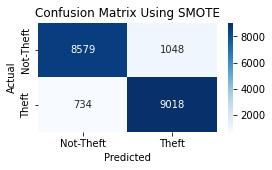

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
TP = 8579
FP = 1048
TN = 9018
FN = 734

# Plot confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap([[TP, FP], [FN, TN]], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not-Theft', 'Theft'], yticklabels=['Not-Theft', 'Theft'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Using SMOTE')
plt.show()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      9627
           1       0.90      0.92      0.91      9752

    accuracy                           0.91     19379
   macro avg       0.91      0.91      0.91     19379
weighted avg       0.91      0.91      0.91     19379



In [31]:
cm=classification_report(actual,predicted)

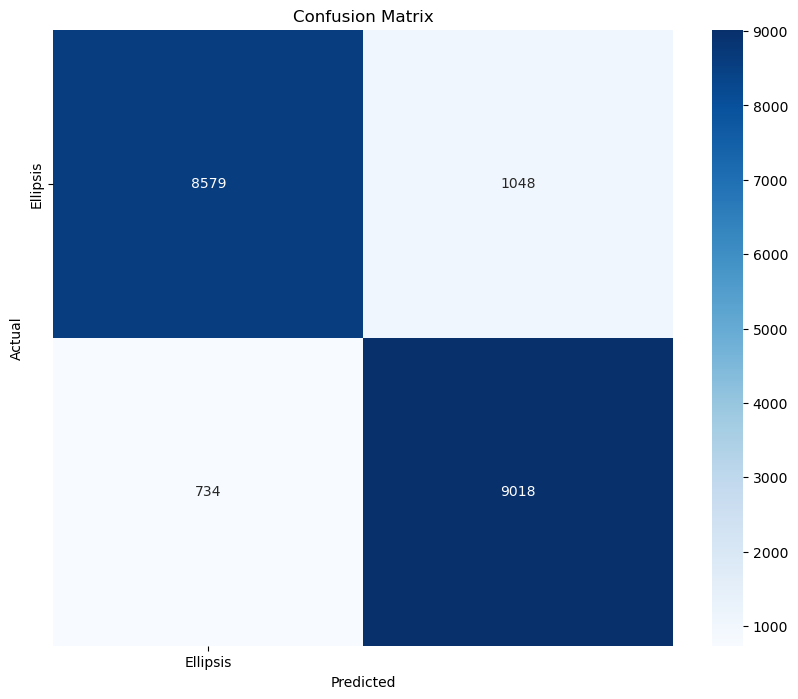

In [32]:
import seaborn as sns
cm = confusion_matrix(actual, predicted)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[...], yticklabels=[...])  # Replace [...] with your class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

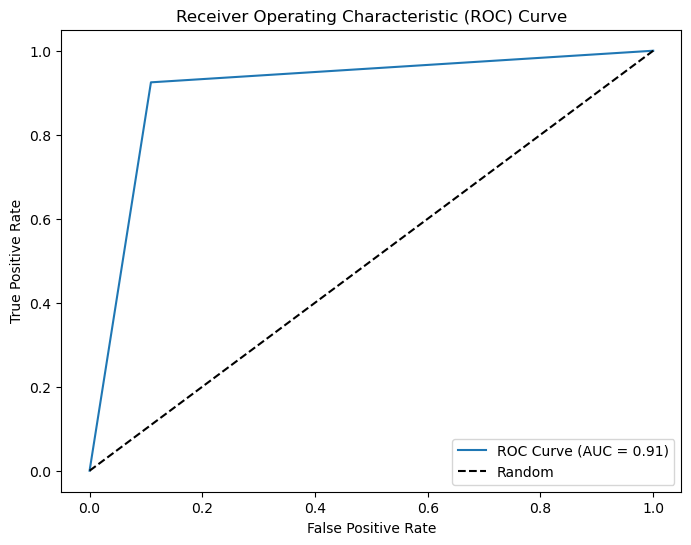

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(actual, predicted)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:
df = pd.DataFrame(X_test).head(10)
#df = pd.DataFrame(X_testNormal)
df.to_csv("D:\ElectricityTheft\\smote\Xtest.csv")


In [35]:
df = pd.DataFrame(X_train).head(10)

df.to_csv("D:\ElectricityTheft\\smote\Xtrain.csv")

In [36]:
val1=[]
val2=[]
for y in y_pred:
    print(y[0])
    print(y[1])
    print("====")
    val1.append(y[0])
    val2.append(y[1])

0.00015486967
0.99984527
====
0.9884561
0.011543935
====
0.00014193862
0.99985814
====
0.011812234
0.9881877
====
0.008208489
0.9917914
====
0.00052948686
0.9994706
====
0.016030088
0.98396987
====
0.99999994
1.8322297e-11
====
0.0126314415
0.9873685
====
0.9999972
2.7932729e-06
====
0.28424224
0.7157578
====
0.99999994
3.1791565e-08
====
0.9681234
0.031876605
====
0.3166331
0.6833669
====
0.0072620143
0.9927379
====
1.763485e-05
0.9999823
====
0.0009153839
0.9990846
====
1.401774e-05
0.9999859
====
0.00078075763
0.99921924
====
3.2679633e-05
0.9999673
====
0.0032188625
0.9967811
====
0.00023931418
0.9997606
====
0.99454457
0.005455491
====
0.99999994
5.762969e-31
====
0.79655474
0.20344512
====
1.4617666e-16
0.99999994
====
0.99672955
0.003270434
====
0.9968697
0.0031304064
====
0.010339042
0.98966104
====
0.99998647
1.3488452e-05
====
0.9747136
0.025286335
====
0.010518674
0.9894813
====
0.000407749
0.99959224
====
0.7057562
0.29424378
====
0.99999994
1.5343735e-10
====
0.20573977
0.

In [37]:
df = pd.DataFrame({'Actual': actual, 'Softmax Predicted Value 1': val1, 'Softmax Predicted Value 2': val2, 'Predicted Result': predicted})
df.to_csv("D:\ElectricityTheft\smote\ActualPredicted.csv")

In [38]:
df = pd.DataFrame({'Training Accuracy': history.history['accuracy'], 'Test Accuracy': history.history['val_accuracy']})
df.to_csv("D:\ElectricityTheft\smote\pcaAccuracies.csv")